In [2]:
import os
import glob
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML

def get_thumbnail(path):
    image = Image.open(path)
    image.thumbnail((150, 150), Image.LANCZOS)
    return image

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

def to_dataframe(folder_path):
    data = []
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                img_format = img.format
                channels = len(img.getbands())
                size_mb = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(file_path)
                data.append({
                    'name': file_name,
                    'color model': color_model,
                    'format': img_format,
                    'channels': channels,
                    'size (MB)': size_mb,
                    'width': width,
                    'height': height,
                    'full path': full_path,
                    'image': file_path
                })
        except Exception as e:
            continue

    df = pd.DataFrame(data)
    return df

,name,color model,format,channels,size (MB),width,height,full path,image
0,22.png,RGB,PNG,3,0.13,300,300,D:\py\img\22.png,
1,El_Gato.png,RGB,PNG,3,0.19,300,446,D:\py\img\El_Gato.png,
2,photo_5368820746656278406_y.jpg,RGB,JPEG,3,0.09,1010,1280,D:\py\img\photo_5368820746656278406_y.jpg,
3,png.png,P,PNG,1,0.02,360,360,D:\py\img\png.png,
4,загружено (1).jpg,RGB,JPEG,3,0.01,194,259,D:\py\img\загружено (1).jpg,
5,загружено (2).jpg,RGB,JPEG,3,0.00,225,225,D:\py\img\загружено (2).jpg,
6,загружено (3).jpg,RGB,JPEG,3,0.01,178,283,D:\py\img\загружено (3).jpg,
7,загружено (4).jpg,RGB,JPEG,3,0.01,225,225,D:\py\img\загружено (4).jpg,
8,загружено (6).jpg,RGB,JPEG,3,0.01,237,213,D:\py\img\загружено (6).jpg,
9,загружено (8).png,RGB,JPEG,3,0.00,225,225,D:\py\img\загружено (8).png,

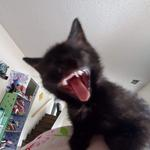
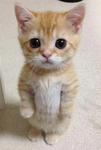
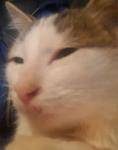
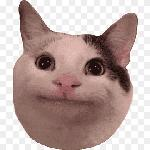
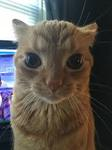
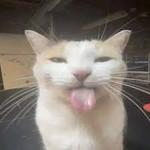
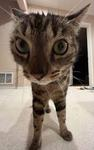
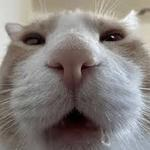
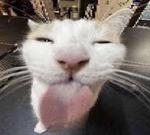
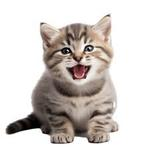
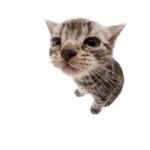

In [4]:
df = to_dataframe(r'D:\py\img')
HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

In [11]:
from PIL import Image, ImageOps
import os
import random

def apply_filter(image, color):
    filters = {
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255),
        "yellow": (255, 255, 0),
        "purple": (255, 0, 255),
        "cyan": (0, 255, 255),
    }
    image = image.convert("RGB")
    overlay = Image.new("RGB", image.size, filters[color])
    return Image.blend(image, overlay, alpha=0.5)

def crop_to_square(image):
    min_side = min(image.size)
    left = (image.width - min_side) // 2
    top = (image.height - min_side) // 2
    right = (image.width + min_side) // 2
    bottom = (image.height + min_side) // 2
    return image.crop((left, top, right, bottom))

def to_poster(folder_path, output_name, rows, cols, size=250):
    images = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    
    total_images_needed = rows * cols
    if len(images) < total_images_needed:
        raise ValueError(f"Not enough images in the folder. Need {total_images_needed}, but found {len(images)}.")

    poster_width = cols * size
    poster_height = rows * size
    poster = Image.new("RGB", (poster_width, poster_height))

    for row in range(rows):
        for col in range(cols):
            img_path = random.choice(images)
            with Image.open(img_path) as img:
                img = crop_to_square(img)
                img = img.resize((size, size))
                color_filter = random.choice(["red", "green", "blue", "yellow", "purple", "cyan"])
                img = apply_filter(img, color_filter)
                poster.paste(img, (col * size, row * size))
            images.remove(img_path)

    poster.save(output_name)
    return poster

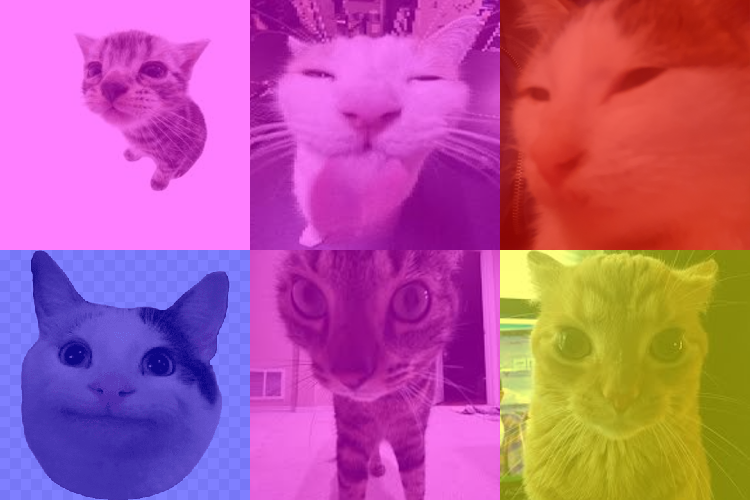

In [12]:
to_poster(r'D:\py\img', 'poster1.png', 2, 3)

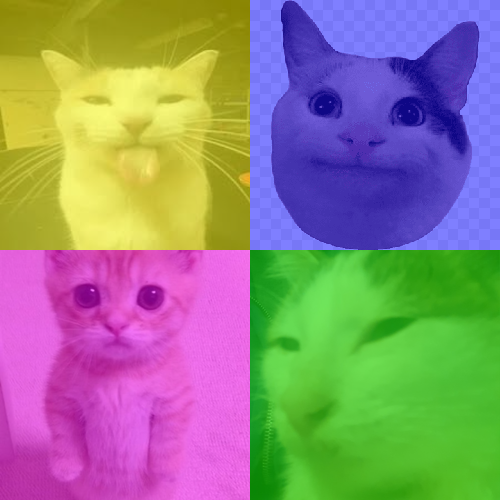

In [13]:
to_poster(r'D:\py\img', 'poster2.jpg', 2, 2)


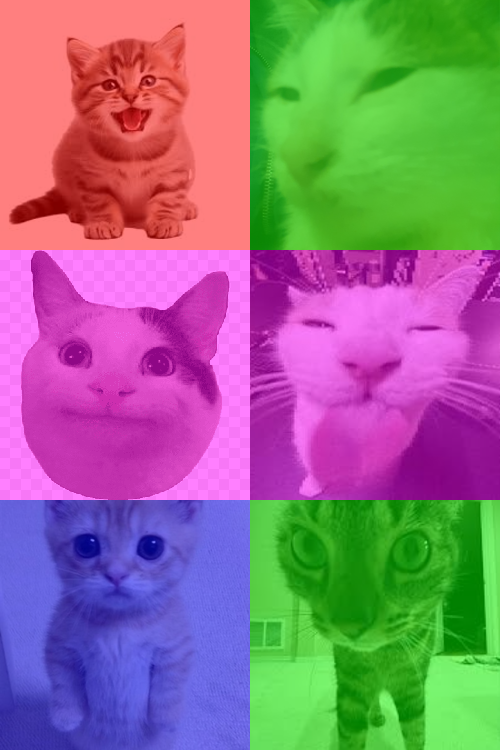

In [14]:
to_poster(r'D:\py\img', 'poster3.png', 3, 2)